## Imports

In [1]:
from RF_modelling import *
from VAE_modelling import *
from result_interpretation import *

In [2]:
score_RF = pd.read_csv("ML_output/RF/score_tuning.csv", index_col = 0)
score_VAE = pd.read_csv("ML_output/vae_plots/all_score.csv", index_col = 0)

In [3]:
score_RF_embedding = pd.read_csv("ML_output/score_tuning_embeddings.csv", index_col = 0)
score_VAE_highcorr = pd.read_csv("ML_output/vae_plots/all_score_highcorr.csv", index_col = 0)
score_RF_downsampling = pd.read_csv("ML_output/score_down_sampling.csv", index_col = 0)
score_RF_veryhigh_corr = pd.read_csv("ML_output/score_veryhigh_corr.csv", index_col = 0)
score_RF_PCA = pd.read_csv("ML_output/score_RF_PCA.csv", index_col = 0)

## Comparison of main models

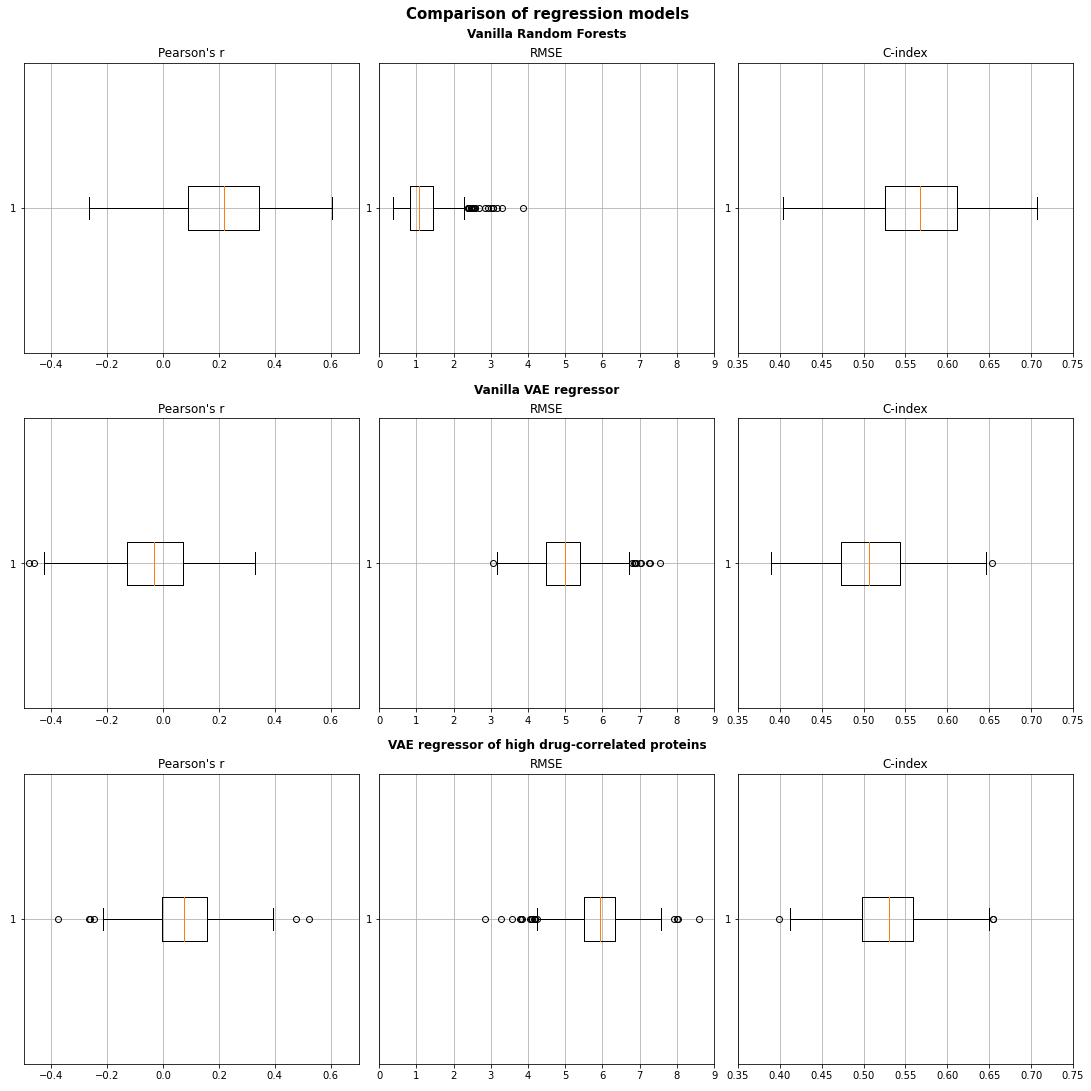

In [4]:
plot_comparison(score_RF, score_VAE, score_VAE_highcorr, label = ["Vanilla Random Forests", "Vanilla VAE \
regressor", "VAE regressor of high drug-correlated proteins"], 
title = "Comparison of regression models", save = False)

## Pearson's r between embeddings

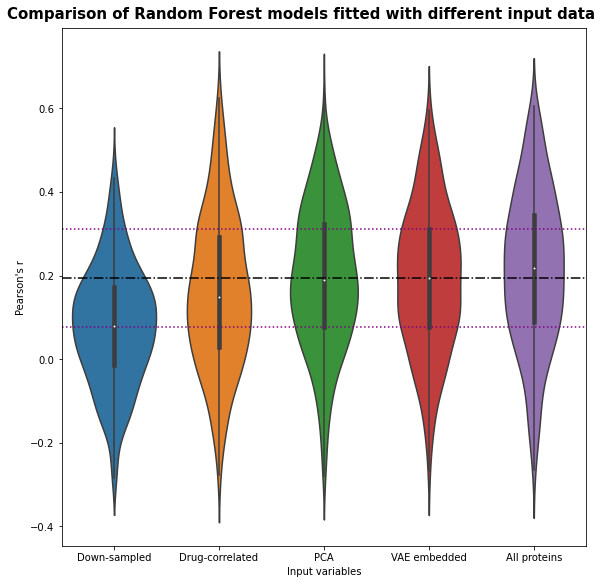

In [5]:
plot_violin(score_RF_downsampling, score_RF_veryhigh_corr, score_RF_PCA, score_RF_embedding, score_RF, save=False)

In [4]:
# normality tests
from scipy.stats import shapiro
print(shapiro(score_RF_downsampling["Pearson's r"]).pvalue)
print(shapiro(score_RF_veryhigh_corr["Pearson's r"]).pvalue)
print(shapiro(score_RF_PCA["Pearson's r"]).pvalue)
print(shapiro(score_RF_embedding["Pearson's r"]).pvalue)
print(shapiro(score_RF["Pearson's r"]).pvalue)

0.7646741271018982
0.07497338205575943
0.225661039352417
0.3806259334087372
0.07264173775911331


In [6]:
# variances are approximately equal, and data normally distrib ==> t-test
# it is okay to compare the means via the t-tests since the data is approximately normal ==> symmetrical
# (as seen on the violin plot)
# n1 = n2 so t-test equal variance = t-test unequal variance

print(score_RF_downsampling["Pearson's r"].var())
print(score_RF_veryhigh_corr["Pearson's r"].var())
print(score_RF_PCA["Pearson's r"].var())
print(score_RF_embedding["Pearson's r"].var())
print(score_RF["Pearson's r"].var())

0.019967196044527877
0.03277130645851858
0.02836989248427363
0.029210448111187982
0.0337111383262523


In [9]:
from scipy.stats import ttest_ind

# down-sampling
print(ttest_ind(score_RF_downsampling["Pearson's r"], score_RF_veryhigh_corr["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF_downsampling["Pearson's r"], score_RF_PCA["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF_downsampling["Pearson's r"], score_RF_embedding["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF_downsampling["Pearson's r"], score_RF["Pearson's r"], alternative = "two-sided")\
      .pvalue, "\n")

# high correlations
print(ttest_ind(score_RF_veryhigh_corr["Pearson's r"], score_RF_downsampling["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF_veryhigh_corr["Pearson's r"], score_RF_PCA["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF_veryhigh_corr["Pearson's r"], score_RF_embedding["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF_veryhigh_corr["Pearson's r"], score_RF["Pearson's r"], alternative = "two-sided")\
      .pvalue, "\n")

# PCA
print(ttest_ind(score_RF_PCA["Pearson's r"], score_RF_downsampling["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF_PCA["Pearson's r"], score_RF_veryhigh_corr["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF_PCA["Pearson's r"], score_RF_embedding["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF_PCA["Pearson's r"], score_RF["Pearson's r"], alternative = "two-sided")\
      .pvalue, "\n")

# VAE
print(ttest_ind(score_RF_embedding["Pearson's r"], score_RF_downsampling["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF_embedding["Pearson's r"], score_RF_veryhigh_corr["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF_embedding["Pearson's r"], score_RF_PCA["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF_embedding["Pearson's r"], score_RF["Pearson's r"], alternative = "two-sided")\
      .pvalue, "\n")

# All proteins
print(ttest_ind(score_RF["Pearson's r"], score_RF_downsampling["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF["Pearson's r"], score_RF_veryhigh_corr["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF["Pearson's r"], score_RF_PCA["Pearson's r"], alternative = "two-sided")\
      .pvalue)
print(ttest_ind(score_RF["Pearson's r"], score_RF_embedding["Pearson's r"], alternative = "two-sided")\
      .pvalue)

2.359836730669438e-10
1.2147228846935144e-20
4.9220671466083705e-19
4.54571276238978e-25 

2.359836730669438e-10
0.010127102617745014
0.025184963992990403
9.050195032900662e-05 

1.2147228846935144e-20
0.010127102617745014
0.7418911147950349
0.12994800675052068 

4.9220671466083705e-19
0.025184963992990403
0.7418911147950349
0.0690168339293779 

4.54571276238978e-25
9.050195032900662e-05
0.12994800675052068
0.0690168339293779


## Comparison between drugs

In [4]:
drug = pd.read_csv("data/drug_sensitivity.csv", index_col = 0)
drug = finalise_drug(drug, min_nb_cell = 260, replace_na = True)
print(drug.shape)

(299, 349)


In [5]:
RF_bad_drugs = get_drugs(score_RF, bad_pred = True)
VAEreg_bad_drugs = get_drugs(score_VAE, bad_pred = True)

RF_good_drugs = get_drugs(score_RF, bad_pred = False)
VAEreg_good_drugs = get_drugs(score_VAE, bad_pred = False)

In [6]:
# to get the badly-predicted drugs

bad_drugs = list(set(RF_bad_drugs).intersection(set(VAEreg_bad_drugs)))

In [7]:
# to get the well-predicted drugs

from scipy.stats import skew

negative_skew = []
for dru in VAEreg_good_drugs:
    if skew(drug[dru]) < -3.5:
        negative_skew.append(dru)

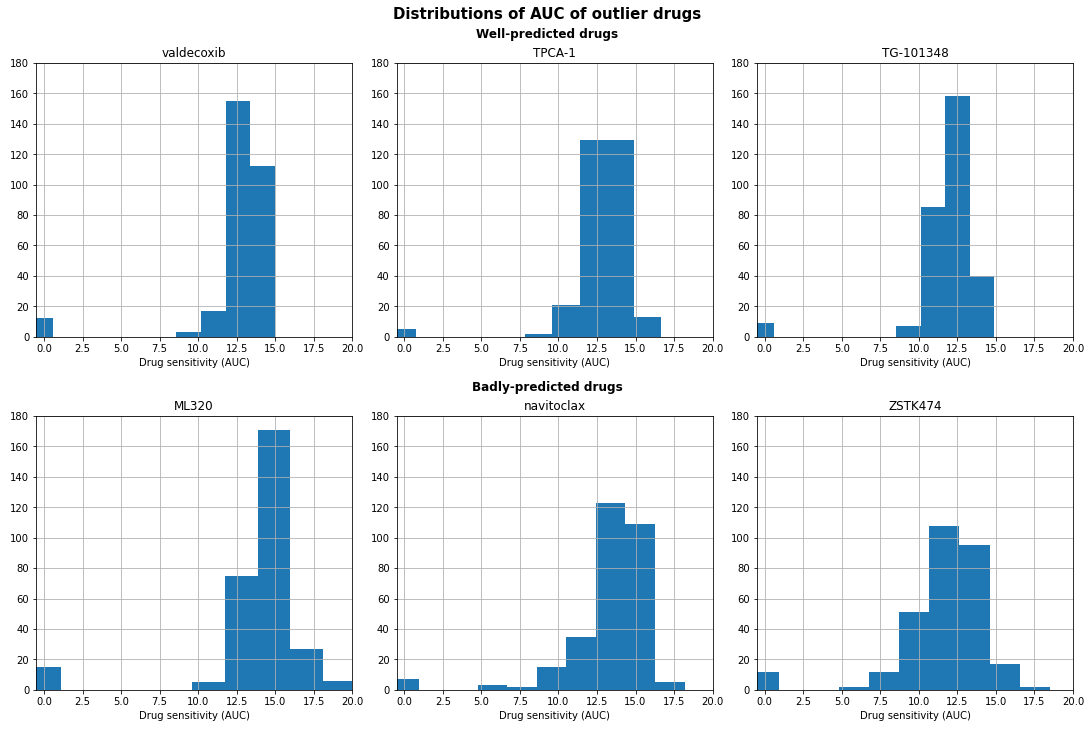

In [9]:
plot_drug_distrib(drug, bad_drugs, negative_skew, save = False)

#### SHAP analysis is directly on the VAE_modelling notebook!